In [19]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'

In [20]:
#f = r.TFile("./data/results_stdp_allCalos_allXtals.root")
f = r.TFile("./data/results_calo4_xtal35_hists.root")
f.ls()

TFile**		./data/results_calo4_xtal35_hists.root	
 TFile*		./data/results_calo4_xtal35_hists.root	
  KEY: TH1D	htime;1	htime
  KEY: TH1D	htime2;1	htime2
  KEY: TH2D	h200_300;1	E_{late} vs. #deltat for E_{early} = 200 Mev - 300 MeV
  KEY: TH2D	h300_400;1	E_{late} vs. #deltat for E_{early} = 300 Mev - 400 MeV
  KEY: TH2D	h400_500;1	E_{late} vs. #deltat for E_{early} = 400 Mev - 500 MeV
  KEY: TH2D	h500_600;1	E_{late} vs. #deltat for E_{early} = 500 Mev - 600 MeV
  KEY: TH2D	h600_700;1	E_{late} vs. #deltat for E_{early} = 600 Mev - 700 MeV
  KEY: TH2D	h700_800;1	E_{late} vs. #deltat for E_{early} = 700 Mev - 800 MeV
  KEY: TH2D	h800_900;1	E_{late} vs. #deltat for E_{early} = 800 Mev - 900 MeV
  KEY: TH2D	h900_1000;1	E_{late} vs. #deltat for E_{early} = 900 Mev - 1000 MeV
  KEY: TH2D	h1000_1100;1	E_{late} vs. #deltat for E_{early} = 1000 Mev - 1100 MeV
  KEY: TH2D	h1100_1200;1	E_{late} vs. #deltat for E_{early} = 1100 Mev - 1200 MeV
  KEY: TH2D	h1200_1300;1	E_{late} vs. #deltat for E_{early

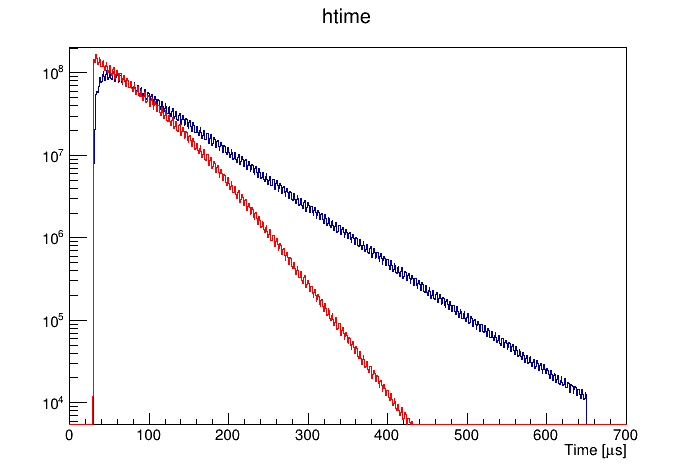

In [21]:
c = r.TCanvas()

htime = f.Get("htime")

htime2 = f.Get("htime2")
htime2.SetLineColor(2)

htime.Draw()
htime2.Draw("SAME")

#htime.GetYaxis().SetRangeUser(0.9,100000)
c.SetLogy()
c.Draw()

In [31]:
hists = []
for i, key in enumerate(f.GetListOfKeys()):
    if(i>1):
        #print(f.Get(key.GetName()))
        hists.append( f.Get(key.GetName()).Clone() )
print(hists)

[<ROOT.TH2D object ("h200_300") at 0x7ffe9e3a2780>, <ROOT.TH2D object ("h300_400") at 0x7ffe9e3a2b90>, <ROOT.TH2D object ("h400_500") at 0x7ffeac661fc0>, <ROOT.TH2D object ("h500_600") at 0x7ffeac6623d0>, <ROOT.TH2D object ("h600_700") at 0x7ffeac6627e0>, <ROOT.TH2D object ("h700_800") at 0x7ffeb083ace0>, <ROOT.TH2D object ("h800_900") at 0x7ffe9e3a0b40>, <ROOT.TH2D object ("h900_1000") at 0x7ffeb083b0f0>, <ROOT.TH2D object ("h1000_1100") at 0x7ffeb083b500>, <ROOT.TH2D object ("h1100_1200") at 0x7ffe9e3a3dd0>, <ROOT.TH2D object ("h1200_1300") at 0x7ffe9e3a41e0>, <ROOT.TH2D object ("h1300_1400") at 0x7ffe9e3a45f0>, <ROOT.TH2D object ("h1400_1500") at 0x7ffe9e3a4a00>, <ROOT.TH2D object ("h1500_1600") at 0x7fffdbb8ece0>, <ROOT.TH2D object ("h1600_1700") at 0x7fffdbb8f2b0>, <ROOT.TH2D object ("h1700_1800") at 0x7fffdbb8f8d0>, <ROOT.TH2D object ("h1800_1900") at 0x7fffdbb90210>, <ROOT.TH2D object ("h1900_2000") at 0x7fffdbb90820>, <ROOT.TH2D object ("h2000_2100") at 0x7fffdbb90e50>, <ROOT.T

In [32]:
for h in hists:
    print(h.GetEntries(),"   ", h)
    h.Rebin2D(10,2)
    
print(len(hists))

1553080.0     <ROOT.TH2D object ("h200_300") at 0x7ffe9e3a2780>
1073709.0     <ROOT.TH2D object ("h300_400") at 0x7ffe9e3a2b90>
832656.0     <ROOT.TH2D object ("h400_500") at 0x7ffeac661fc0>
701448.0     <ROOT.TH2D object ("h500_600") at 0x7ffeac6623d0>
610844.0     <ROOT.TH2D object ("h600_700") at 0x7ffeac6627e0>
543898.0     <ROOT.TH2D object ("h700_800") at 0x7ffeb083ace0>
494352.0     <ROOT.TH2D object ("h800_900") at 0x7ffe9e3a0b40>
449135.0     <ROOT.TH2D object ("h900_1000") at 0x7ffeb083b0f0>
410768.0     <ROOT.TH2D object ("h1000_1100") at 0x7ffeb083b500>
374985.0     <ROOT.TH2D object ("h1100_1200") at 0x7ffe9e3a3dd0>
339947.0     <ROOT.TH2D object ("h1200_1300") at 0x7ffe9e3a41e0>
303472.0     <ROOT.TH2D object ("h1300_1400") at 0x7ffe9e3a45f0>
267155.0     <ROOT.TH2D object ("h1400_1500") at 0x7ffe9e3a4a00>
231603.0     <ROOT.TH2D object ("h1500_1600") at 0x7fffdbb8ece0>
201163.0     <ROOT.TH2D object ("h1600_1700") at 0x7fffdbb8f2b0>
172788.0     <ROOT.TH2D object ("h1700

for i, h in enumerate(E_v_deltaT_hists):
    c = r.TCanvas("c","c",1100,1000)
    h.Draw("colz")
    c.SetLogz()
    c.Draw()
    c.Print("./images/stdp_E_v_deltaT_"+str(Eearlys[i]).zfill(4)+".png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


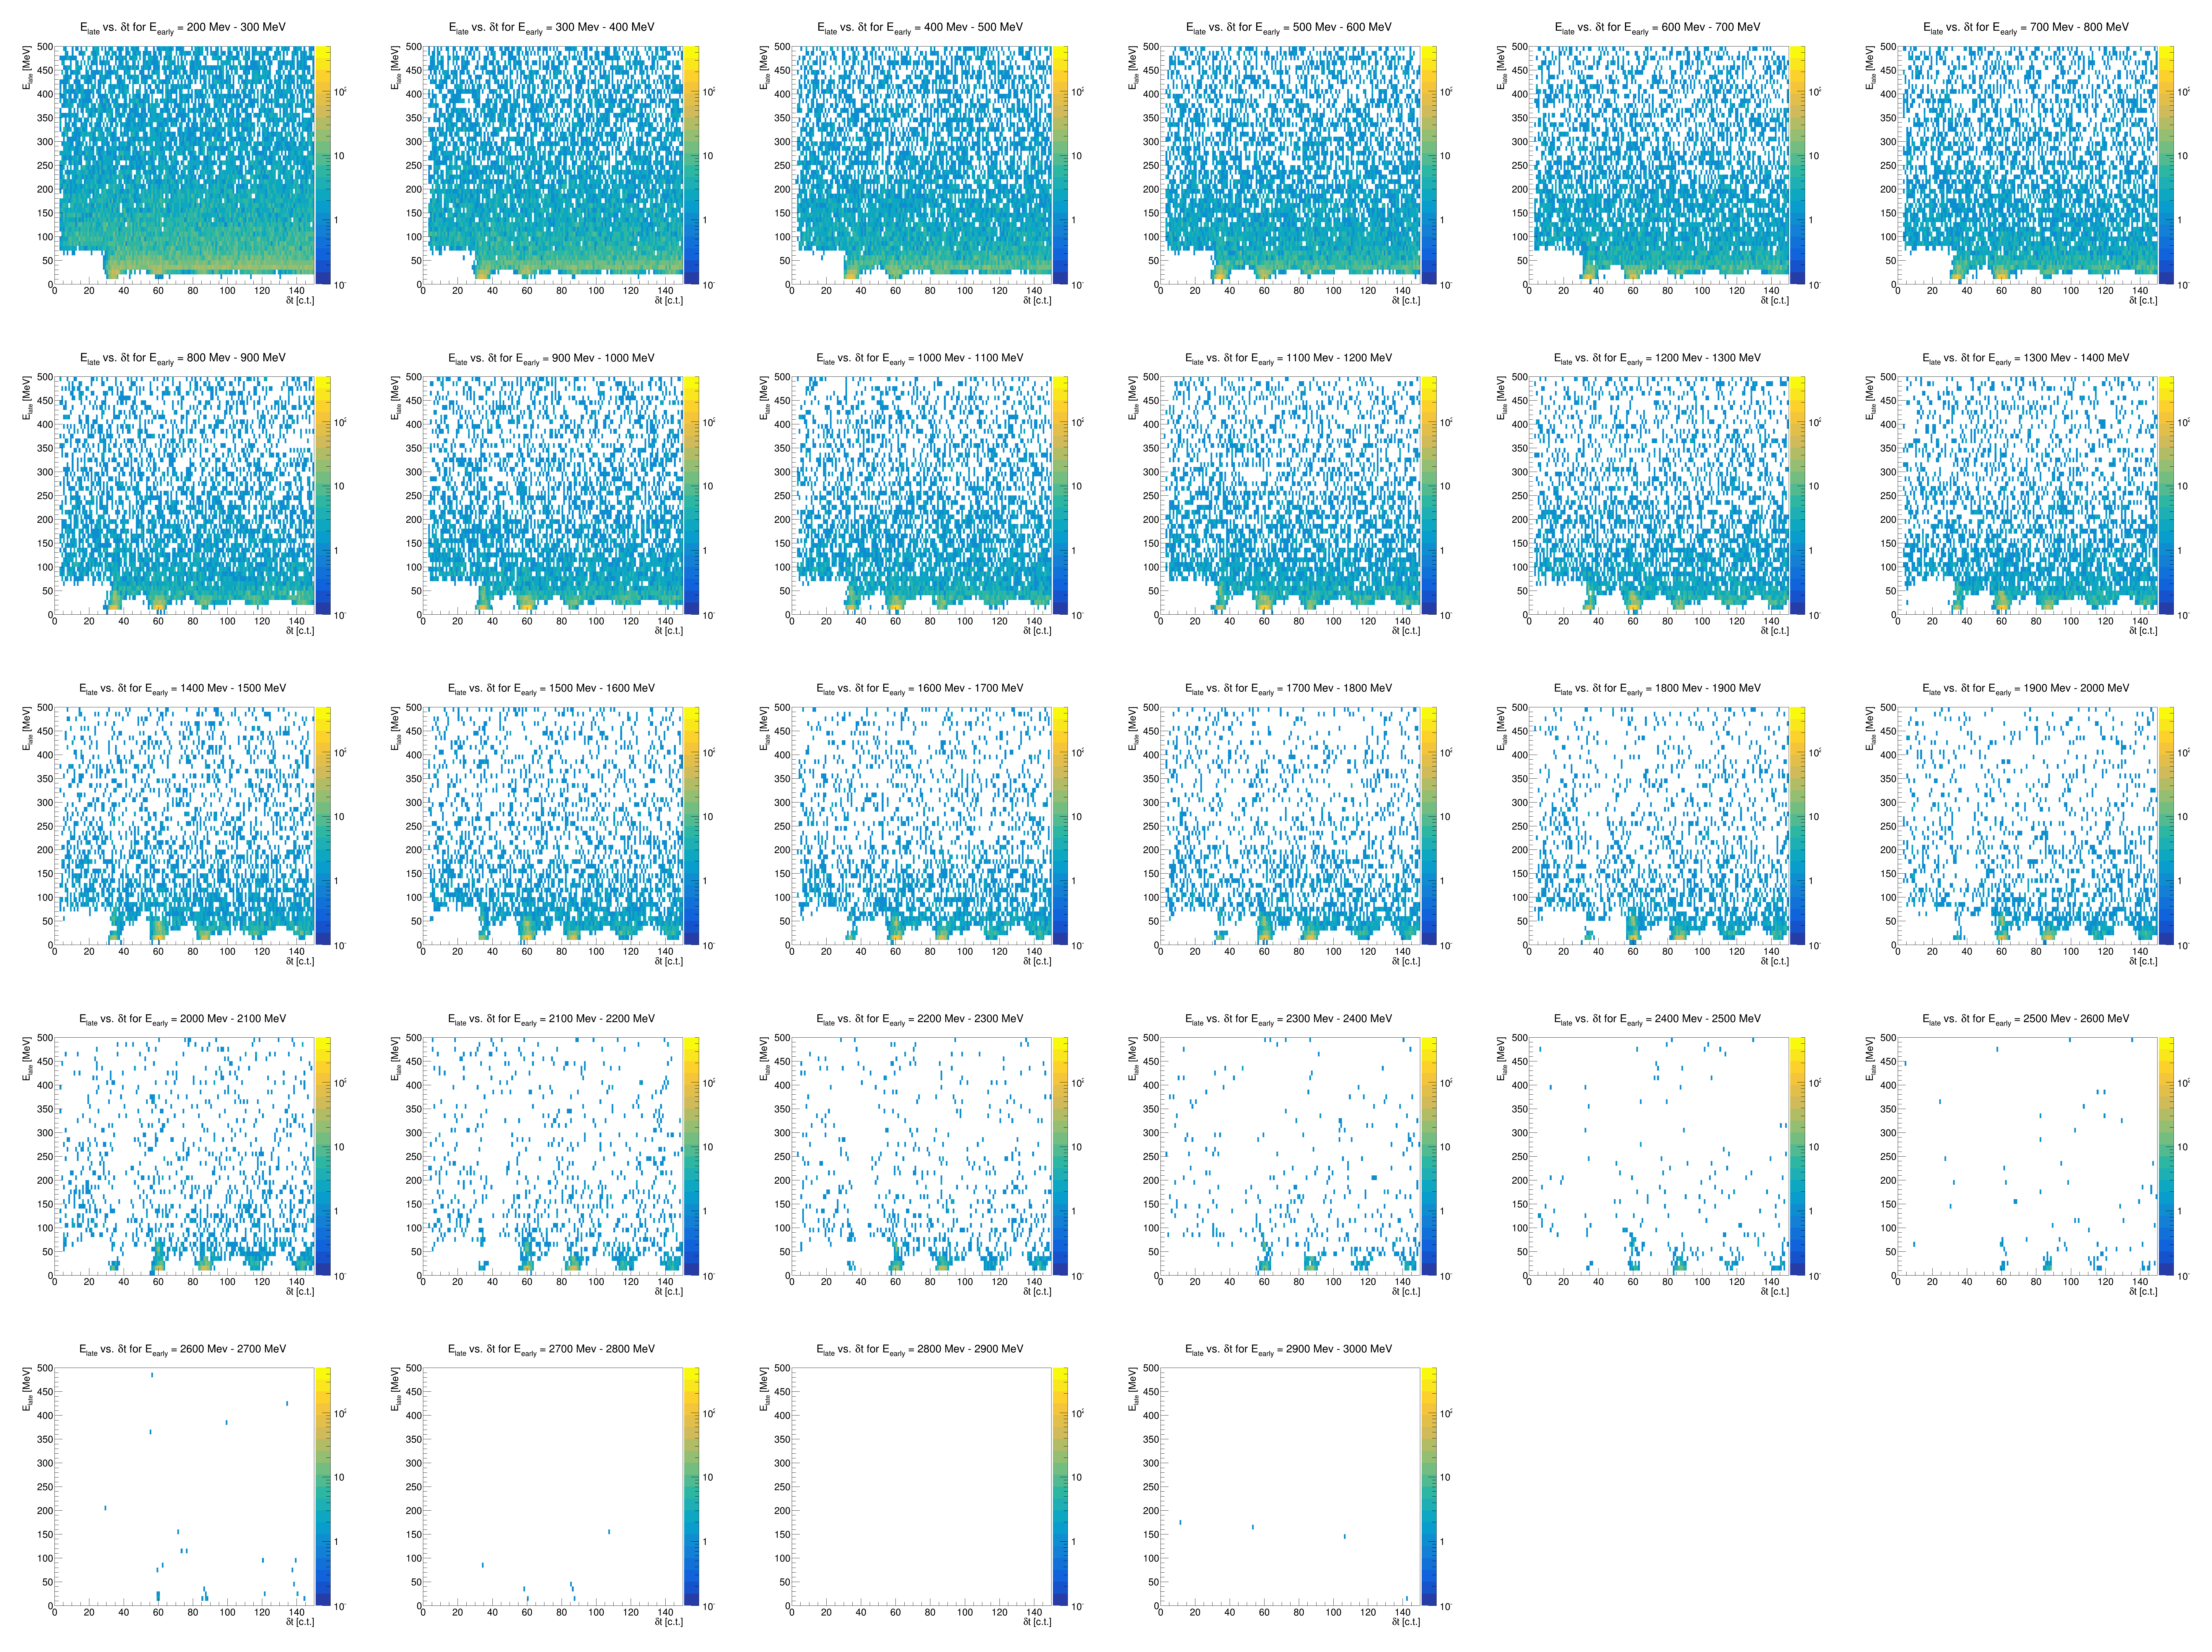

In [38]:
c = r.TCanvas("c","c",8000,6000)
width = 6
c.Divide(width,int(np.ceil(len(hists)/width)))
for i, h in enumerate(hists):
    c.cd(i+1)
    h.Draw("COLZ")
    h.GetZaxis().SetRangeUser(0.1,500)
    h.GetYaxis().SetRangeUser(0,500)
    #r.gPad.SetLogy()
    r.gPad.SetLogz()
c.Draw()